<a href="https://colab.research.google.com/github/ertgrulyksk/sentiment_analysis_imdb_movies/blob/main/sentiment_analysis_imdb_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.embeddings import Embedding
from keras.layers import SimpleRNN, Dense, Activation

import warnings 
warnings.filterwarnings('ignore')

In [2]:
(X_egitim, Y_egitim), (X_test, Y_test) = imdb.load_data(path = "ibdb.npz", 
                                                        num_words = None, 
                                                        skip_top = 0, 
                                                        maxlen = None, 
                                                        seed = 113, 
                                                        start_char = 1, 
                                                        oov_char = 2, 
                                                        index_from = 3)
                                                        

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
print("X eğitim tipi: ", type(X_egitim))
print("Y eğitim tipi: ", type(Y_egitim))

X eğitim tipi:  <class 'numpy.ndarray'>
Y eğitim tipi:  <class 'numpy.ndarray'>


In [4]:
print("X eğitim şekli: ",X_egitim.shape)
print("Y eğitim şekli: ",Y_egitim.shape)

X eğitim şekli:  (25000,)
Y eğitim şekli:  (25000,)


In [5]:
print("Y eğitim değerleri: ",np.unique(Y_egitim))
print("Y test değerleri: ",np.unique(Y_test))

Y eğitim değerleri:  [0 1]
Y test değerleri:  [0 1]


In [6]:
unique, counts = np.unique(Y_egitim, return_counts = True)
print("Y eğitim dağılımı: ",dict(zip(unique,counts)))

Y eğitim dağılımı:  {0: 12500, 1: 12500}


In [7]:
unique, counts = np.unique(Y_test, return_counts = True)
print("Y test dağılımı: ",dict(zip(unique,counts)))

Y test dağılımı:  {0: 12500, 1: 12500}


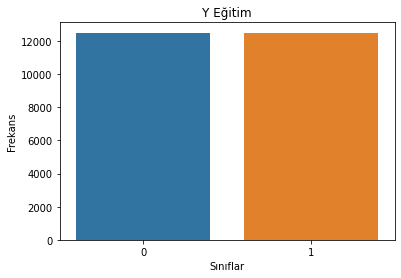

In [8]:
plt.figure()
sns.countplot(Y_egitim)
plt.xlabel("Sınıflar")
plt.ylabel("Frekans")
plt.title("Y Eğitim")
plt.show()

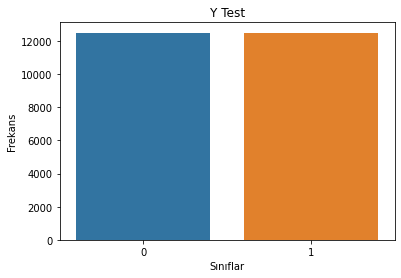

In [9]:
plt.figure()
sns.countplot(Y_test)
plt.xlabel("Sınıflar")
plt.ylabel("Frekans")
plt.title("Y Test")
plt.show()

In [10]:
yorum = X_egitim[0]
print("Yorum: ")
print(yorum)
print("Yorum kelime sayısı: ",len(yorum))

Yorum: 
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Yorum kelime sayısı:  218


In [11]:
word_index = imdb.get_word_index()
print("Kelime sayısı: ",len(word_index))

1654784/1641221 [==============================] - 0s 0us/step
Kelime sayısı:  88584


In [12]:
for keys, values in word_index.items():
    if values == 1:
        print(keys)

the


In [13]:
def neSoyledi(index = 24):
    
    ters_indeks = dict([(value, key)
                        for (key, value) in word_index.items()])
    yorumu_coz = " ".join([ters_indeks.get(i - 3, "!")
                        for i in X_egitim[index]])
    print("Yorum: ",index)
    print(yorumu_coz)
    print()
    if Y_egitim[index] == 0:
        print("Olumsuz")
    else:
        print("Olumlu")
    print()

neSoyledi(36)

Yorum:  36
! sorry i just didn't find the subject matter as compelling as the filmmaker did the robot guy and the mole rat guy were pretty interesting although morris didn't really tell us much about them the other two subjects were a bore and the supposed connections between them didn't hold up

Olumsuz



In [14]:
neSoyledi(0)

Yorum:  0
! this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and

In [15]:
num_words = 15000
(X_egitim, Y_egitim), (X_test, Y_test) = imdb.load_data(num_words=num_words)

17473536/17464789 [==============================] - 0s 0us/step


In [16]:
maxlen = 130 
X_egitim = pad_sequences(X_egitim, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

print(X_egitim[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]


In [17]:
rnn = Sequential()
rnn.add(Embedding(num_words, 32, input_length = len(X_egitim[0])))
rnn.add(SimpleRNN(16, input_shape = (num_words, maxlen), return_sequences = False, activation = "relu"))

rnn.add(Dense(1))
rnn.add(Activation("sigmoid"))
print(rnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 32)           480000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 16)                784       
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 480,801
Trainable params: 480,801
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
rnn.compile(loss = "binary_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [19]:
tarih = rnn.fit(X_egitim, Y_egitim, validation_data = (X_test, Y_test), epochs = 5, batch_size = 128, verbose = 1)

Epoch 1/5
196/196 [==============================] - 12s 49ms/step - loss: 0.6536 - accuracy: 0.6249 - val_loss: 0.6048 - val_accuracy: 0.6950
Epoch 2/5
196/196 [==============================] - 10s 54ms/step - loss: 0.4372 - accuracy: 0.8124 - val_loss: 0.3507 - val_accuracy: 0.8445
Epoch 3/5
196/196 [==============================] - 9s 47ms/step - loss: 0.3192 - accuracy: 0.8653 - val_loss: 0.3601 - val_accuracy: 0.8318
Epoch 4/5
196/196 [==============================] - 9s 48ms/step - loss: 0.2572 - accuracy: 0.8957 - val_loss: 0.3256 - val_accuracy: 0.8576
Epoch 5/5
196/196 [==============================] - 9s 48ms/step - loss: 0.2213 - accuracy: 0.9115 - val_loss: 0.3603 - val_accuracy: 0.8392


In [20]:
dogruluk = rnn.evaluate(X_test, Y_test)
print("Test Doğruluk: %",dogruluk[1]*100)

782/782 [==============================] - 7s 8ms/step - loss: 0.3603 - accuracy: 0.8392
Test Doğruluk: % 83.924001455307


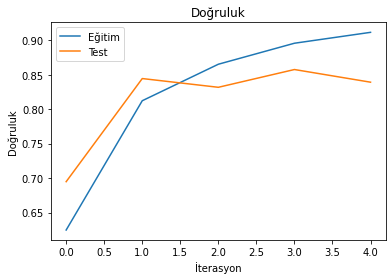

In [24]:
plt.figure()
plt.plot(tarih.history["accuracy"], label = "Eğitim")
plt.plot(tarih.history["val_accuracy"], label = "Test")
plt.title("Doğruluk")
plt.ylabel("Doğruluk")
plt.xlabel("İterasyon")
plt.legend()
plt.show()

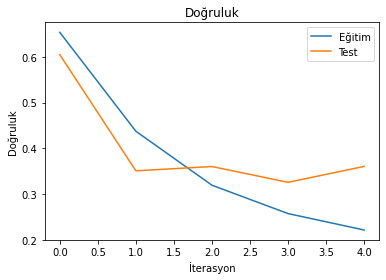

In [26]:
plt.figure()
plt.plot(tarih.history["loss"], label = "Eğitim")
plt.plot(tarih.history["val_loss"], label = "Test")
plt.title("Doğruluk")
plt.ylabel("Doğruluk")
plt.xlabel("İterasyon")
plt.legend()
plt.show()